PHY5340 Laboratory 6: Finite Differences

Jeremiah O'Neil, SN6498391

---

# Finite Differences for Eigenvalues and Eigenfunctions

In [1]:
newV = @(pars) (@(x) pars(1)*x.^2 + pars(2)*x.^3 + pars(3)*x.^4);

In [2]:
%type('tise_fd.m')
V = newV([50, 0, 2500]);
% bind potential, num Lanczos iters, num returned eigs to solver
part1_solver = @(x0, x1, N) tise_fd(V, x0, x1, N, 100, 3);
% choose endpoints and grid size and solve
x0 = -0.5; x1 = 0.5; N = 2000;
[eigE, eigfuncs, x] = part1_solver(x0, x1, N);

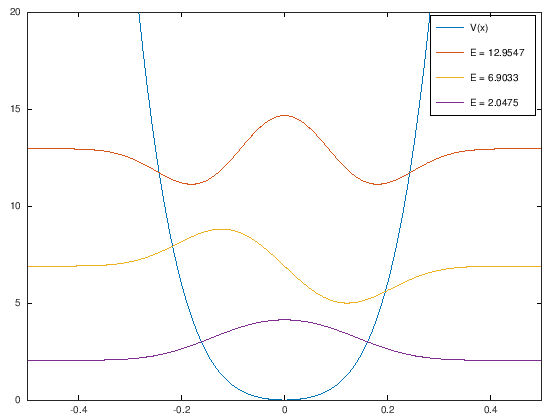

In [3]:
%type('plot_eigs.m')
plot_eigs(x, V, eigE, eigfuncs);
xlim([-0.5, 0.5]);
ylim([0, 20]);

In [4]:
%type('test_sensitivity.m')
[xd, Nd, delta_eigE] = test_sensitivity(5, part1_solver, x0, x1, N, eigE)

xd =

  -0.54018  -0.54126  -0.58660  -0.52934  -0.54118
   0.51327   0.55329   0.54721   0.55535   0.54321

Nd =

   2347   2133   2054   2113   2261

delta_eigE =

   9.9057e-06  -2.8262e-06  -1.1339e-05  -2.8650e-06   4.0240e-06
   3.0619e-06  -8.5280e-07  -3.4713e-06  -8.6479e-07   1.2543e-06
   4.5664e-07  -1.2636e-07  -5.1623e-07  -1.2815e-07   1.8745e-07



In [5]:
V = newV([50, 1500, 2500]);
part2_solver = @(x0, x1, N) tise_fd(V, x0, x1, N, 100, 3);
x0 = -0.9; x1 = 0.5; N = 3000;
[eigE, eigfuncs, x] = part2_solver(x0, x1, N);

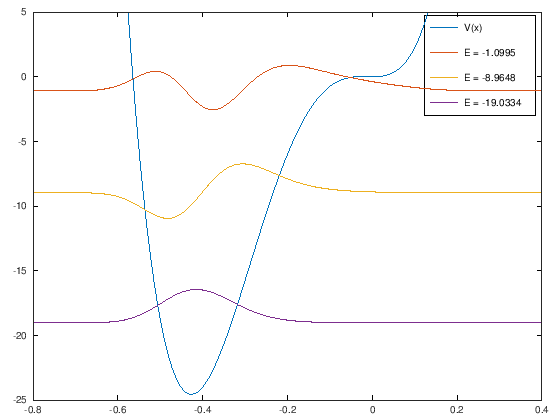

In [6]:
plot_eigs(x, V, eigE, eigfuncs);
xlim([-0.8, 0.4]);
ylim([-25, 5]);

In [7]:
[xd, Nd, delta_eigE] = test_sensitivity(5, part2_solver, x0, x1, N, eigE)

xd =

  -1.00450  -0.90070  -0.99080  -0.97699  -1.06397
   0.54639   0.53341   0.56034   0.55387   0.53846

Nd =

   3195   2954   3389   3211   3566

delta_eigE =

  -4.8516e-06  -4.8661e-06   2.2482e-06  -2.5886e-06   4.3004e-06
  -3.3420e-06  -3.3520e-06   1.5486e-06  -1.7831e-06   2.9623e-06
  -8.5985e-07  -8.6238e-07   3.9843e-07  -4.5877e-07   7.6208e-07



# Finite Differences for Nonlinear ODE

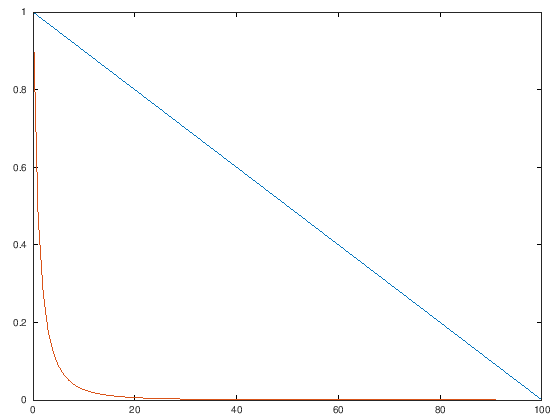

In [8]:
%type('thomas_fermi_fd.m')
r = linspace(0, 100, 101);
n_init = linspace(1, 0, 101);
plot(r, n_init); hold on;
n = thomas_fermi_fd(n_init, r, 0, 1e-5, 10000);
plot(r, n); hold off;

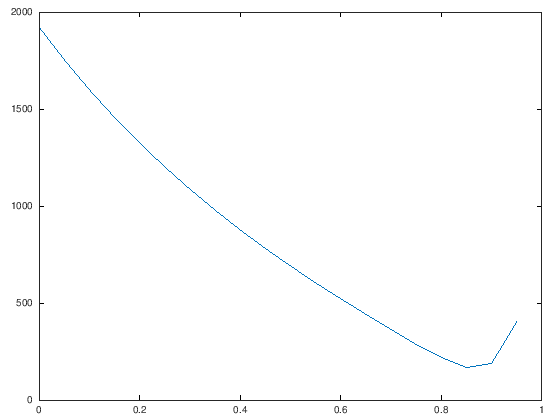

In [9]:
N = 20;
numiter = zeros(1, N);
# want alpha to be N evenly spaced values in [0,1)
# this sort of thing is why FORTRAN indexing sucks
alpha = linspace(0, 1, N+1);
alpha = alpha(1:end-1);
for i = [1:N]
    [~, numiter(i)] = thomas_fermi_fd(n_init, r, alpha(i), 1e-5, 10000);
end
plot(alpha, numiter)